In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

In [2]:
path = r"C:\Users\habib\OneDrive\المستندات\Depi_workingSpace\Depi_workigSpace\Contents\F_Data Analysis\Visualization\MatPlotLib & SeaBorn\train.csv"
df =pd.read_csv(path)

dtypess = df.dtypes
nuniquess = df.nunique()
pd.DataFrame({"Data Types ":dtypess , "Num_Unique ":nuniquess}).T

df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

cols = ['Survived','Pclass','Parch','Sex' , 'Embarked','SibSp']
df[cols] = df[cols].astype('category')
pd.DataFrame({"Data Types ":dtypess , "Num_Unique ":nuniquess}).T

df1 = df.dropna(subset=['Embarked'],inplace=True)
df2 = df.drop('Cabin',axis=1,inplace=True)

median = df['Age'].median()
df['Age'].fillna(median,inplace=True)

null = df.isnull().sum()
ratio = round(((null/df.shape[0])*100),2).astype(str)+"%"
# null / number of rows 

pd.DataFrame({ "Num_Nulls":null , "Ratio %" : ratio}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Num_Nulls,0,0,0,0,0,0,0,0
Ratio %,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%


In [3]:
num_cols = df.select_dtypes('number').columns
num_cols

Index(['Age', 'Fare'], dtype='object')

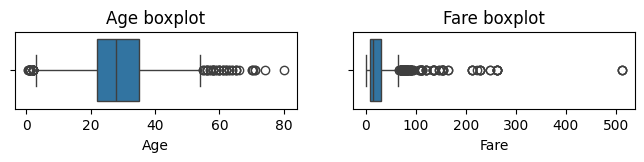

In [4]:
plt.figure(figsize=(8,1))
for i ,col in enumerate(num_cols):
    plt.subplot(1,2,i+1)
    sns.boxplot(df[col],orient='h')
    plt.title(f"{col} boxplot")

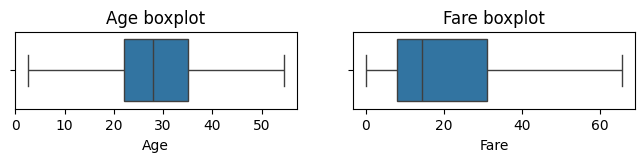

In [5]:
for col in num_cols :
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    
    Lower_fence = Q1 - 1.5*IQR
    Upper_fence = Q3 + 1.5*IQR
    
    Lower_outliers = df[df[col] < Lower_fence][col].values
    Upper_outliers = df[df[col] > Upper_fence][col].values

    df[col].replace(Lower_outliers , Lower_fence,inplace=True)
    df[col].replace(Upper_outliers , Upper_fence,inplace=True)
    

plt.figure(figsize=(8,1))
for i ,col in enumerate(num_cols):
    plt.subplot(1,2,i+1)
    sns.boxplot(df[col],orient='h')
    plt.title(f"{col} boxplot")